In [1]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bhouse=datasets.load_boston()

In [3]:
dir(bhouse)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [64]:
bhouse.target.shape

(506,)

In [5]:
bhouse.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
data=bhouse.data.astype(np.float32)
target=bhouse.target.astype(np.float32)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=123)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(model.coef_)

[-1.0099333e-01  3.9957233e-02  7.5376257e-02  2.6458082e-01
 -1.4340877e+01  4.8331914e+00 -7.4414397e-03 -1.3267373e+00
  2.7349454e-01 -1.3044027e-02 -9.5662665e-01  6.4245472e-03
 -4.8657069e-01]


In [12]:
print(len(model.coef_))

13


In [13]:
predictions=model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

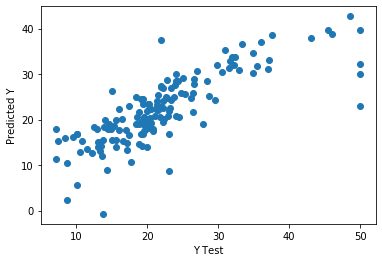

In [14]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.6913674
MSE: 28.40589
RMSE: 5.3297176


In [16]:
model.score(X_test,y_test)

0.6485641443248457

That is a pretty low score for our linear regression model.

In [17]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]], dtype=float32)

In [19]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [37]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [54]:
from sklearn import preprocessing
scaler = preprocessing.Normalizer()

In [55]:
scaled_data=scaler.fit_transform(data)

In [56]:
scaled_data

array([[1.26388350e-05, 3.59966792e-02, 4.61957371e-03, ...,
        3.05971783e-02, 7.93726802e-01, 9.95908119e-03],
       [5.78529907e-05, 0.00000000e+00, 1.49769550e-02, ...,
        3.77071835e-02, 8.40785444e-01, 1.93620045e-02],
       [5.85729940e-05, 0.00000000e+00, 1.51744625e-02, ...,
        3.82044427e-02, 8.43137741e-01, 8.64965841e-03],
       ...,
       [1.23765814e-04, 0.00000000e+00, 2.43009590e-02, ...,
        4.27762046e-02, 8.08470309e-01, 1.14884665e-02],
       [2.24644726e-04, 0.00000000e+00, 2.44548917e-02, ...,
        4.30471674e-02, 8.06519449e-01, 1.32831261e-02],
       [9.69214307e-05, 0.00000000e+00, 2.43887920e-02, ...,
        4.29308154e-02, 8.11392426e-01, 1.61092784e-02]], dtype=float32)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target, test_size=0.3, random_state=123)

In [58]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(model.coef_)
print(len(model.coef_))

[-8.5092331e+01  1.3334897e+01  5.7191883e+01  4.5547939e+01
 -5.8836636e+03  3.1731401e+03 -5.3219924e+00 -5.1487000e+02
  1.6024854e+02  7.0786142e+00 -4.1471411e+02  1.1172889e+01
 -2.2101704e+02]
13


Text(0, 0.5, 'Predicted Y')

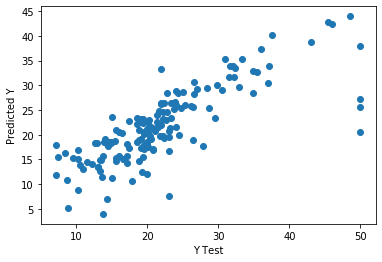

In [60]:
predictions=model.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.651234
MSE: 30.03811
RMSE: 5.4807034


In [62]:
model.score(X_test,y_test)

0.6283703821134158